In [11]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_digits
import random
import math
import scipy.optimize as op 

In [41]:
data1 = sio.loadmat('ex3data1.mat')
X = data1['X']
y = np.tile(data1['y'],(1,1))
y[np.where(y==10)]=0
m = X.shape[0]


In [13]:
rand_indices = list(range(m))
random.shuffle(rand_indices)
sel = X[rand_indices[0:100],:]

In [14]:
def displayData(data, initial_width=20):
    m, n = data.shape
    initial_height = int(n/initial_width)
    print(initial_height)
    display_rows = int(np.sqrt(m))#向下取整
    display_cols = math.ceil(m/display_rows)#向上取整
    pad = 1
    display_array = - np.ones((pad+display_rows * (initial_height + pad), pad+display_cols * (initial_width + pad)))
    curr_ex = 0
    for i in range(0, display_rows):
        for j in range(0, display_cols):
            if curr_ex>m:
                break
            max_val = np.max(np.abs(data[curr_ex, :]))
            display_array[0+(pad+(i)*(initial_height+pad)):initial_height+(pad+(i)*(initial_height+pad)),
                         0+(pad+(j)*(initial_width+ pad)):initial_width+(pad+(j)*(initial_width+pad))]=data[curr_ex, 
                                                                                    :].reshape(initial_height,
                                                                                              initial_width)/max_val
            
            curr_ex +=1
        if curr_ex>m:
            break
    plt.gray()
    plt.matshow(display_array.T)
    plt.show()

20


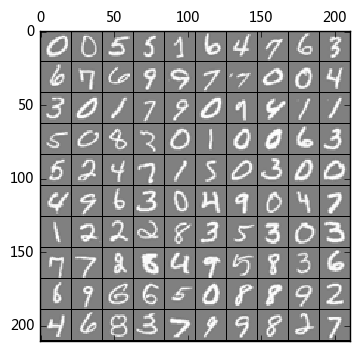

In [15]:
displayData(sel)

In [16]:
def sigmoid(theta, X):
    z = X.dot(theta)
    g = 1/(1+np.exp(-z))
    return g
def gradent(theta, X, y, lamda):
    m = len(y)
    h = sigmoid(theta, X)
    theta_temp = np.tile(theta, (1, 1)).reshape(X.shape[1], 1)#复制矩阵
    theta_temp[0, :] = 0
    #print(theta.shape,theta_temp.shape,X.shape, y.shape)
    grad = (X.T.dot(h-y))/m + lamda/m * theta_temp
    return grad.flatten()
def lrCostFunction(theta, X, y, lamda):
    m = len(y)
    theta = theta.reshape(X.shape[1], 1)
    #grad = np.zeros(X.shape)
    theta_temp = np.tile(theta, (1, 1))#复制矩阵
    theta_temp[0, :] = 0
    #print(theta.shape,theta_temp.shape)
    h = sigmoid(theta, X)
    J = 1/m * (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h))) + lamda/(2*m) *theta_temp.T.dot(theta_temp)
    #grad = (X.T.dot(h-y))/m + lamda/m * theta_temp
    return J

In [17]:
#test 
theta_t = np.array([[-2],[-1],[1],[2]])
X_t = np.c_[np.ones((5,1)),np.arange(1,16).reshape(5,3, order='F')/10] 
y_t = (np.array([[1],[0],[1],[0],[1]]) >= 0.5)
lamda_t = 3
J = lrCostFunction(theta_t, X_t, y_t, lamda_t)[0,0]
grad = gradent(theta_t, X_t, y_t, lamda_t)
print('Cost:{}'.format(J),'Expected:2.534819')
print('Gradients:\n%s'%grad)
print('Expected:\n 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

Cost:2.534819396109744 Expected:2.534819
Gradients:
[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected:
 0.146561
 -0.548558
 0.724722
 1.398003



In [22]:
def oneVsAll(X, y, num_labels, lamda):
    m, n = X.shape
    theta_optim = np.zeros((num_labels, n+1))
    X = np.c_[np.ones((m, 1)), X]
    theta_init = np.zeros((n+1, 1))
    for i in range(0, num_labels):
        #print(X.shape,y.shape,theta_init.shape)
        result = op.minimize(fun=lrCostFunction, x0=theta_init, args=(X, (y==i), lamda), method='CG',
                             options={'maxiter':50})# jac=gradent)
        theta_optim[i, :] = result.x
    return theta_optim

In [23]:
import time
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
num_labels = 10
lamda = 0.1
theta_optim = oneVsAll(X, y, num_labels, lamda)
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

2017-12-06 12:51:32
2017-12-06 13:11:18


In [24]:
def predictOneVsAll(theta_optim, X):
    m = X.shape[0]
    num_labels = theta_optim.shape[0]
    X = np.c_[np.ones((m, 1)), X]
    p = np.argmax(sigmoid(theta_optim.T, X), axis=1)
    
    return p.reshape(m, 1)
    
p = predictOneVsAll(theta_optim, X)
acc = (p==y).mean()
print(acc)

0.8814


In [25]:
(1.01**3-0.99**3)/0.02

3.0001000000000055

In [26]:
data2 = sio.loadmat('ex3weights.mat')
theta1 = data2['Theta1']
theta2 = data2['Theta2']

In [44]:
import time
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

def predict(theta1, theta2, X):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]
    z1 = sigmoid(theta1.T, X)
    z11 = np.c_[np.ones((m, 1)), z1]
    z2 = sigmoid(theta2.T, z11)
    p = np.argmax(z2, axis=1)
    return p.reshape(m, 1)
pp = predict(theta1, theta2, data1['X'])
acc_pp = (pp==data1['y']).mean()
print(acc_pp)
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))


2017-12-06 14:36:22
0.0012
2017-12-06 14:36:22


In [35]:
[4500:5000,:]

array([[9],
       [9],
       [9],
       [7],
       [9],
       [9],
       [5],
       [9],
       [9],
       [2],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [4],
       [9],
       [9],
       [9],
       [9],
       [7],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [7],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [7],
       [9],
       [9],
       [9],
       [9],
       [9],
       [4],
    